## Collect all tweets from @realDonaldTrump

In [1]:
import sys
sys.path.append('..')

from twords.twords import Twords 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# this pandas line makes the dataframe display all text in a line; useful for seeing entire tweets
pd.set_option('display.max_colwidth', -1)

In [2]:
twit = Twords()
# set path to folder that contains jar files for twitter search
twit.jar_folder_path = "../jar_files_and_background/"

In [3]:
twit.get_all_user_tweets("realdonaldtrump", tweets_per_run=500)

Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.0 minutes
Tweets timeline incremented by only one day - may need larger tweets_per_run, or could just be regular stutter in querying timeline.
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.2 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.2 minutes
Time to collect 500 tweets: 0.2 minutes
Time to collect 500 tweets: 0.2 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets: 0.2 minutes
Time to collect 500 tweets: 0.1 minutes
Time to collect 500 tweets:

In [8]:
twit.get_java_tweets_from_csv_list()
twit.convert_tweet_dates_to_standard()

To sort tweets by favorites or retweets, need to convert unicode to integers: 

In [5]:
twit.tweets_df["retweets"] = twit.tweets_df["retweets"].map(int)
twit.tweets_df["favorites"] = twit.tweets_df["favorites"].map(int)

In [6]:
twit.tweets_df.sort_values("favorites", ascending=False)[:5]

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
646,NaN,2016-11-09,220178,632046,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before,NaN,NaN,796315640307060738,https://twitter.com/realDonaldTrump/status/796315640307060738
655,NaN,2016-11-08,343888,572956,TODAY WE MAKE AMERICA GREAT AGAIN!,NaN,NaN,795954831718498305,https://twitter.com/realDonaldTrump/status/795954831718498305
9760,NaN,2017-01-22,83032,395308,"Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views.",NaN,NaN,823174199036542980,https://twitter.com/realDonaldTrump/status/823174199036542980
9911,NaN,2016-12-31,141383,350082,"Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!",NaN,NaN,815185071317676033,https://twitter.com/realDonaldTrump/status/815185071317676033
26258,NaN,2016-06-09,164689,292474,"How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted?https://twitter.com/hillaryclinton/status/740973710593654784 …",NaN,NaN,741007091947556864,https://twitter.com/realDonaldTrump/status/741007091947556864


In [7]:
twit.tweets_df.sort_values("retweets", ascending=False)[:5]

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
655,NaN,2016-11-08,343888,572956,TODAY WE MAKE AMERICA GREAT AGAIN!,NaN,NaN,795954831718498305,https://twitter.com/realDonaldTrump/status/795954831718498305
646,NaN,2016-11-09,220178,632046,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before,NaN,NaN,796315640307060738,https://twitter.com/realDonaldTrump/status/796315640307060738
5065,NaN,2014-06-04,177131,146331,Are you allowed to impeach a president for gross incompetence?,NaN,NaN,474134260149157888,https://twitter.com/realDonaldTrump/status/474134260149157888
26258,NaN,2016-06-09,164689,292474,"How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted?https://twitter.com/hillaryclinton/status/740973710593654784 …",NaN,NaN,741007091947556864,https://twitter.com/realDonaldTrump/status/741007091947556864
15021,NaN,2012-11-06,157054,113664,The electoral college is a disaster for a democracy.,NaN,NaN,266038556504494082,https://twitter.com/realDonaldTrump/status/266038556504494082


For some reason the search did not include Trump's username - random errors like this sometimes happen when querying the twitter website.

## Look at word frequencies

In [11]:
twit.background_path = '../jar_files_and_background/freq_table_72319443_total_words_twitter_corpus.csv'
twit.create_Background_dict()
twit.create_Stop_words()

In [12]:
twit.lower_tweets()
twit.keep_only_unicode_tweet_text()
twit.remove_urls_from_tweets()
twit.convert_tweet_dates_to_standard()
twit.sort_tweets_by_date()
twit.drop_duplicates_in_text()

Removing urls from tweets...
This may take a minute - cleaning rate is about 400,000 tweets per minute
Time to complete: 0.073 minutes
Tweets cleaned per minute: 433395.4


Make word frequency dataframe:

In [14]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag()
twit.create_word_freq_df(10000)

Time to make words_string:  0.0 minutes
Time to tokenize:  0.252 minutes
Time to compute word bag:  0.059 minutes
Creating word_freq_df...
Takes about 1 minute per 1000 words
Time to create word_freq_df:  4.9931 minutes


In [15]:
twit.word_freq_df.sort_values("log relative frequency", ascending = False, inplace = True)
twit.word_freq_df.head(20)

,word,occurrences,frequency,relative frequency,log relative frequency,background_occur
576,turnberry,84,0.000274,1981.871725,7.591797,10
326,“donald,142,0.000463,1595.384269,7.374870,21
948,mar-a-lago,52,0.000170,1226.872973,7.112224,10
984,cpac,51,0.000166,1203.279262,7.092806,10
622,trumpforpresident,78,0.000254,1150.193412,7.047685,16
761,melaniatrump,65,0.000212,1095.422297,6.998895,14
243,doral,173,0.000564,1074.134738,6.979271,38
1617,traceadkins,29,0.000095,855.272024,6.751420,8
453,“trump,105,0.000343,799.141825,6.683538,31
689,karlrove,72,0.000235,772.157815,6.649189,22


### Look at most and least Trump-like tweets at varying levels of background requirement

### At least 100 background occurrences: 

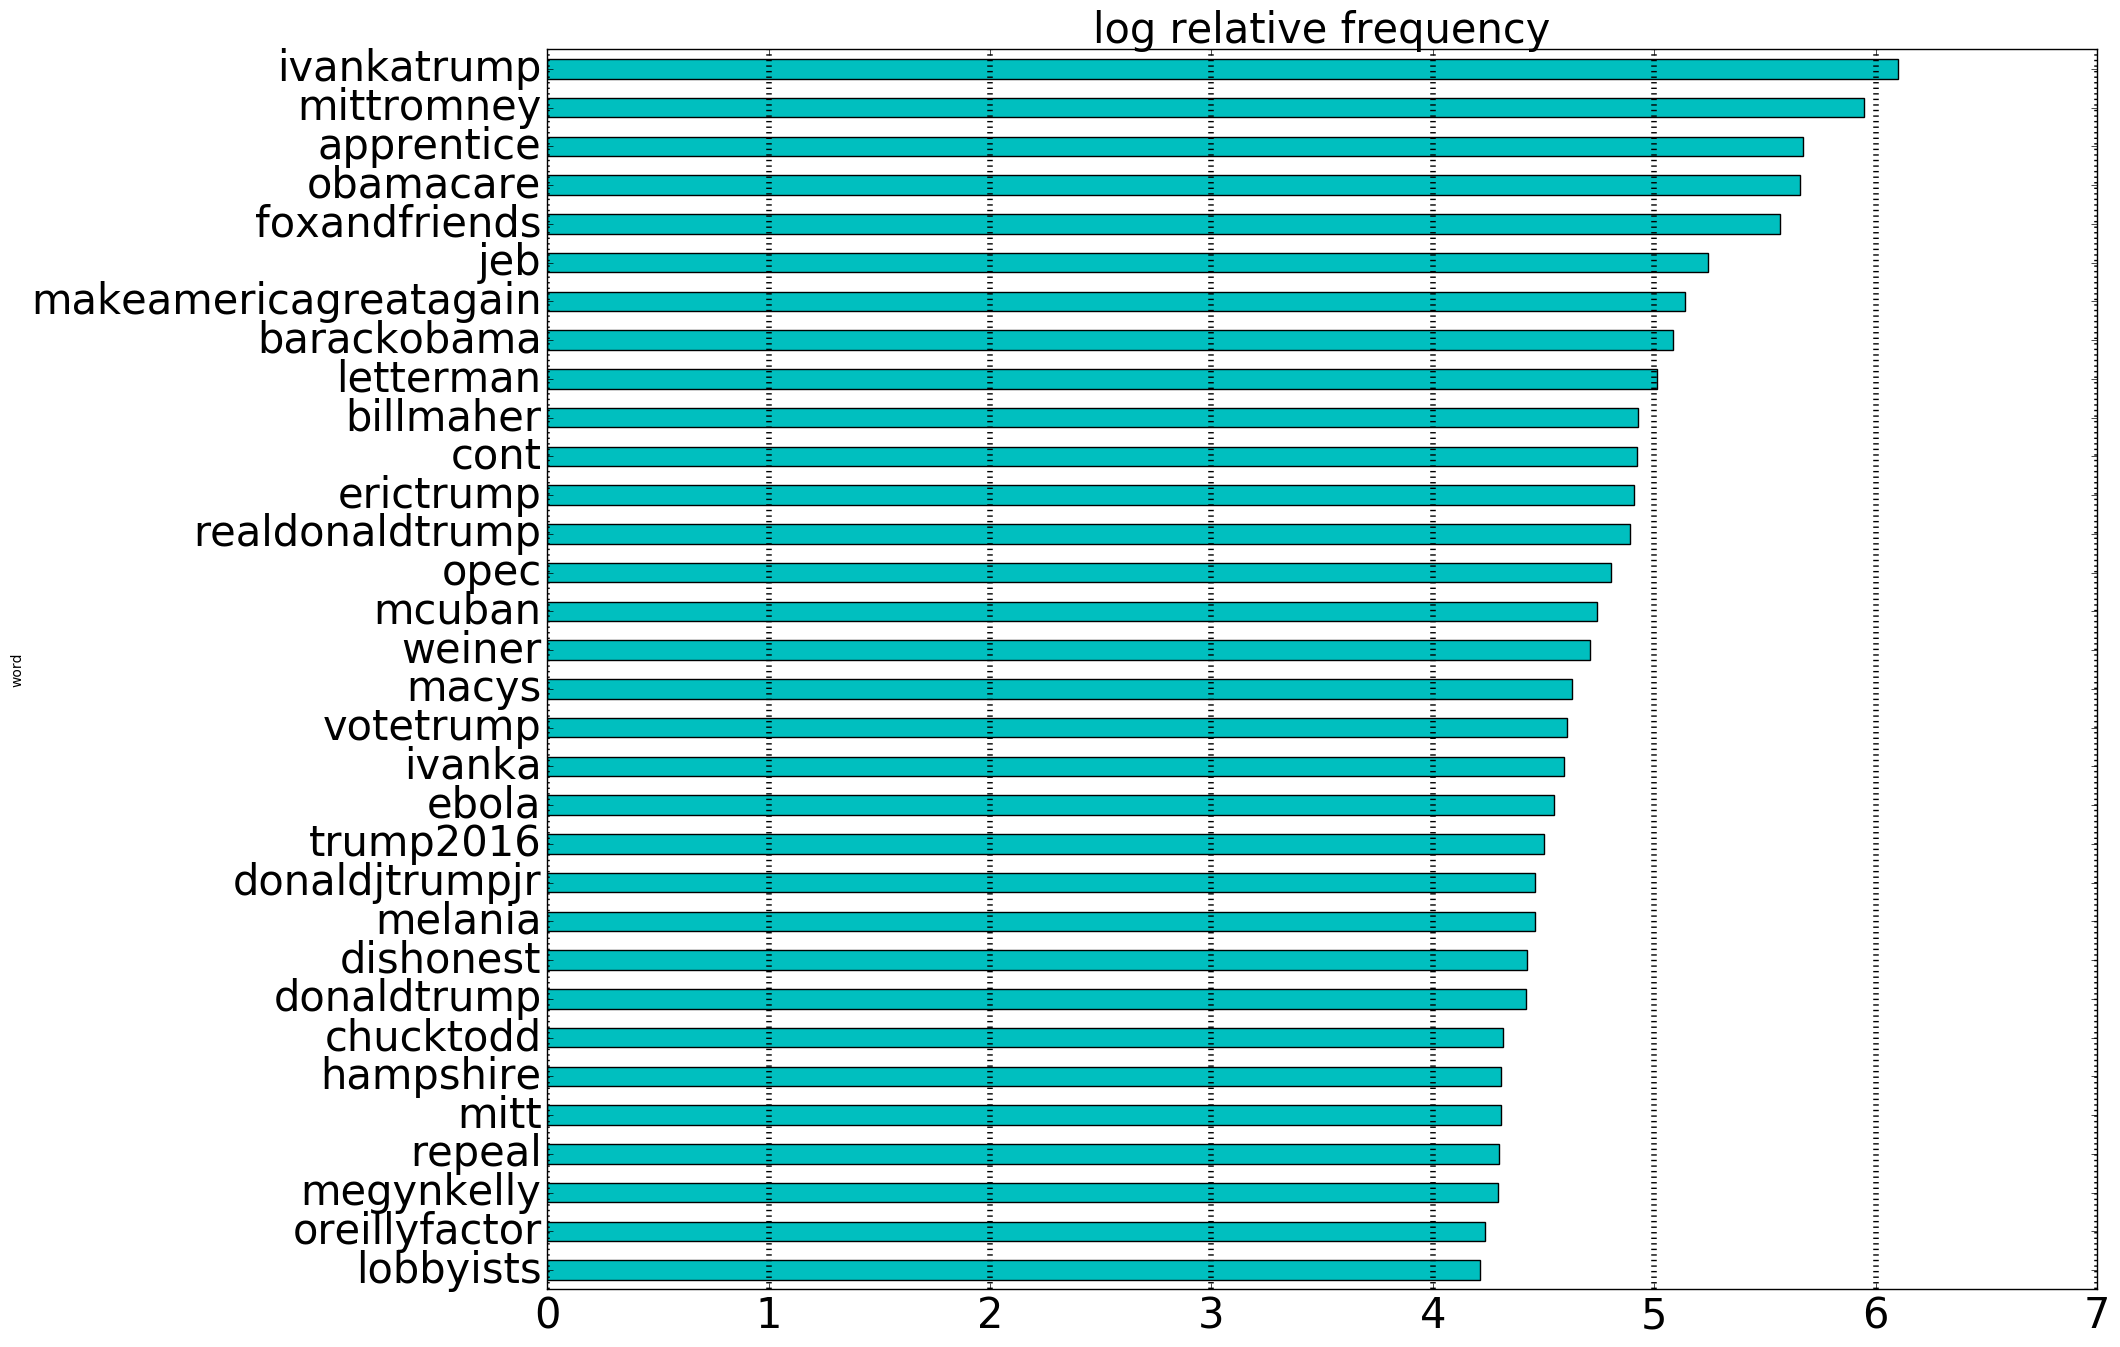

In [17]:
num_words_to_plot = 32
background_cutoff = 100
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

### At least 1000 background occurrences: 

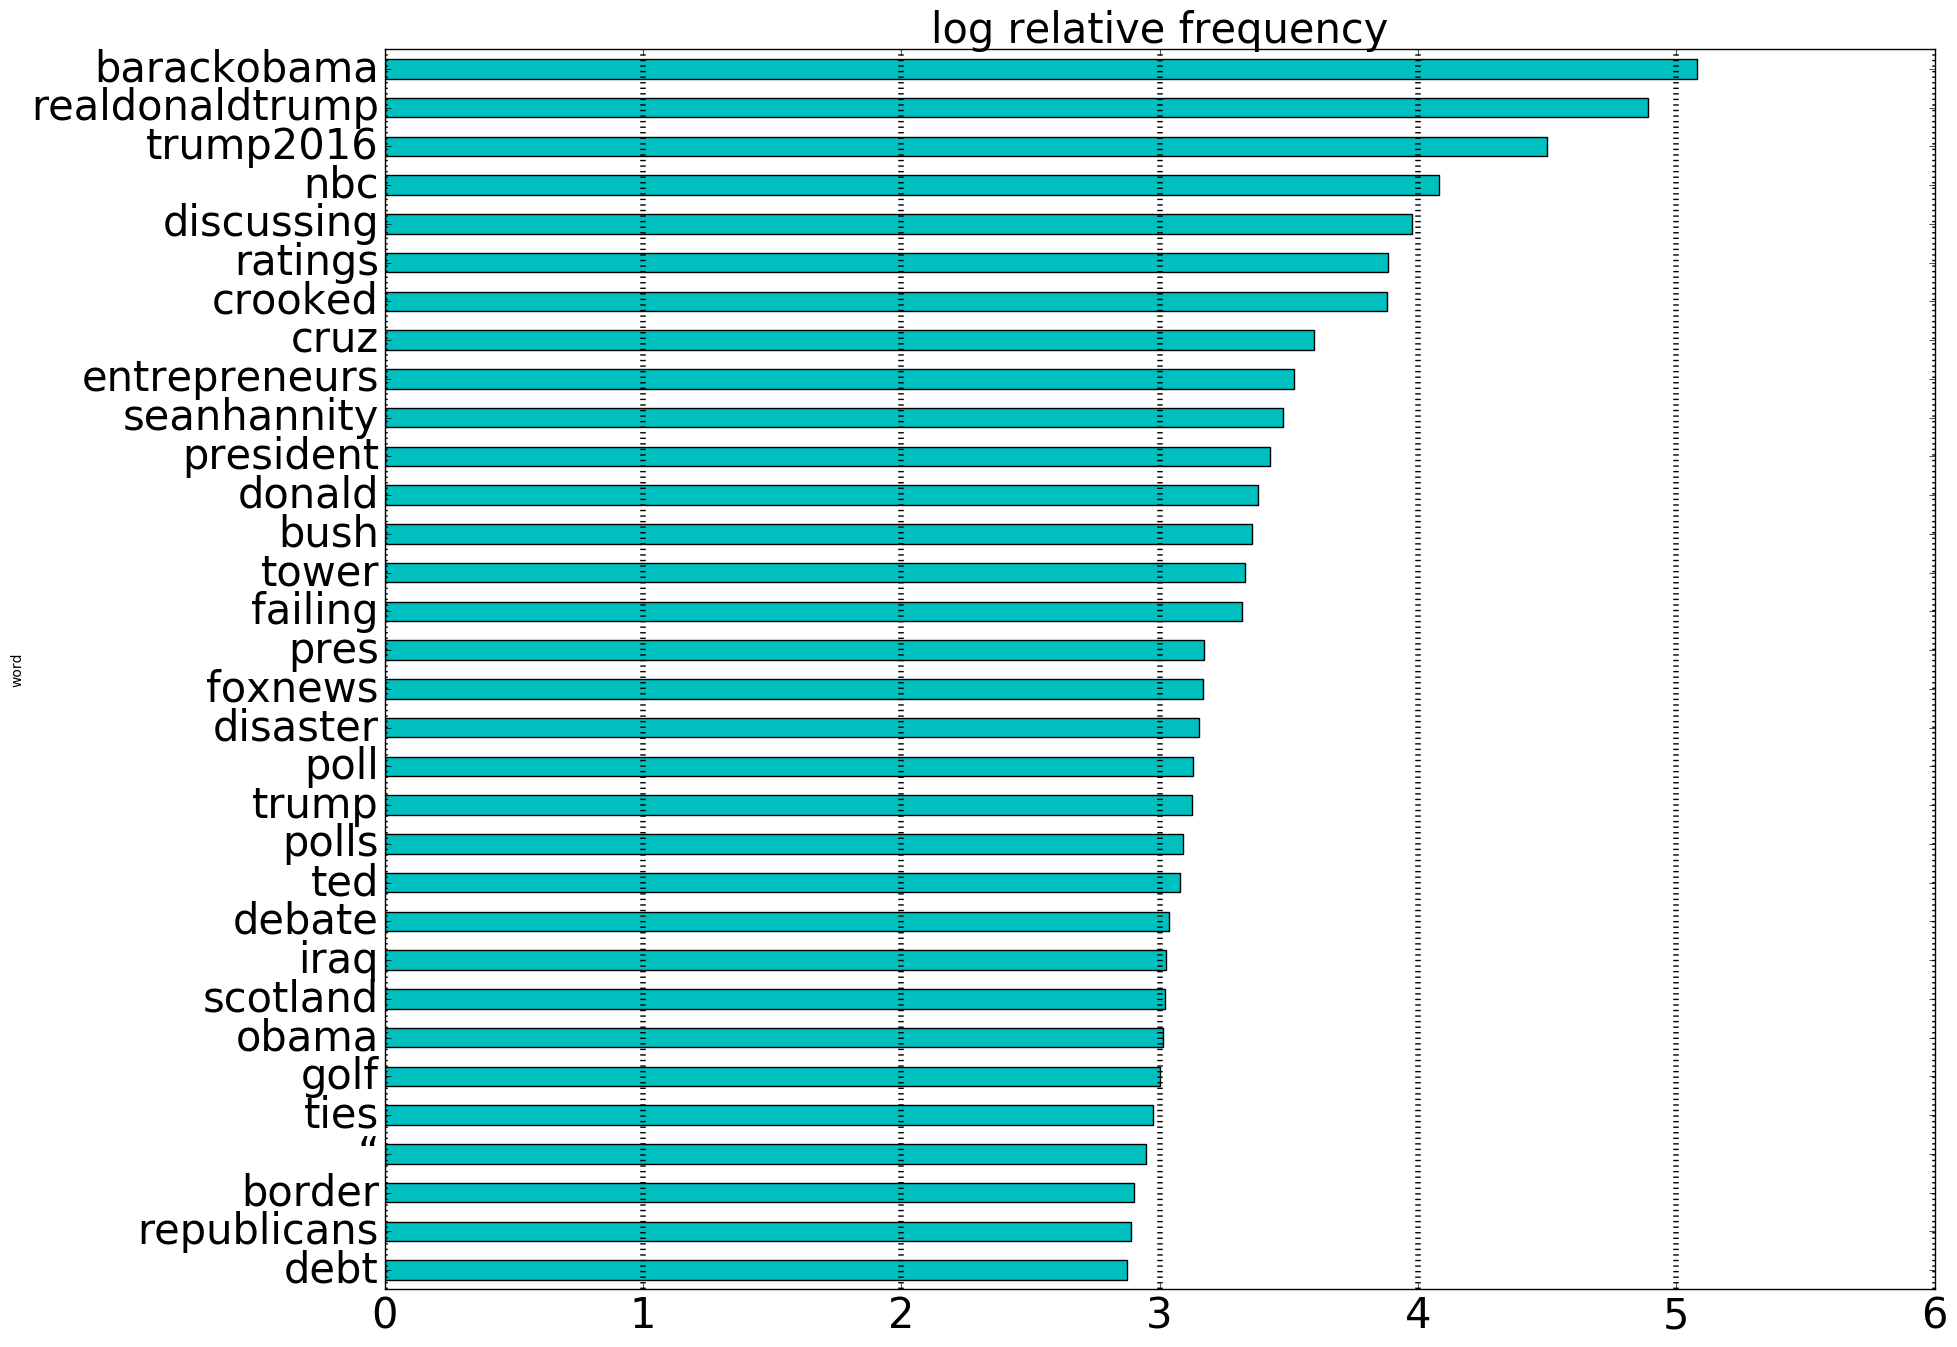

In [19]:
num_words_to_plot = 32
background_cutoff = 1000
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

### At least 10,000 background occurrences: 

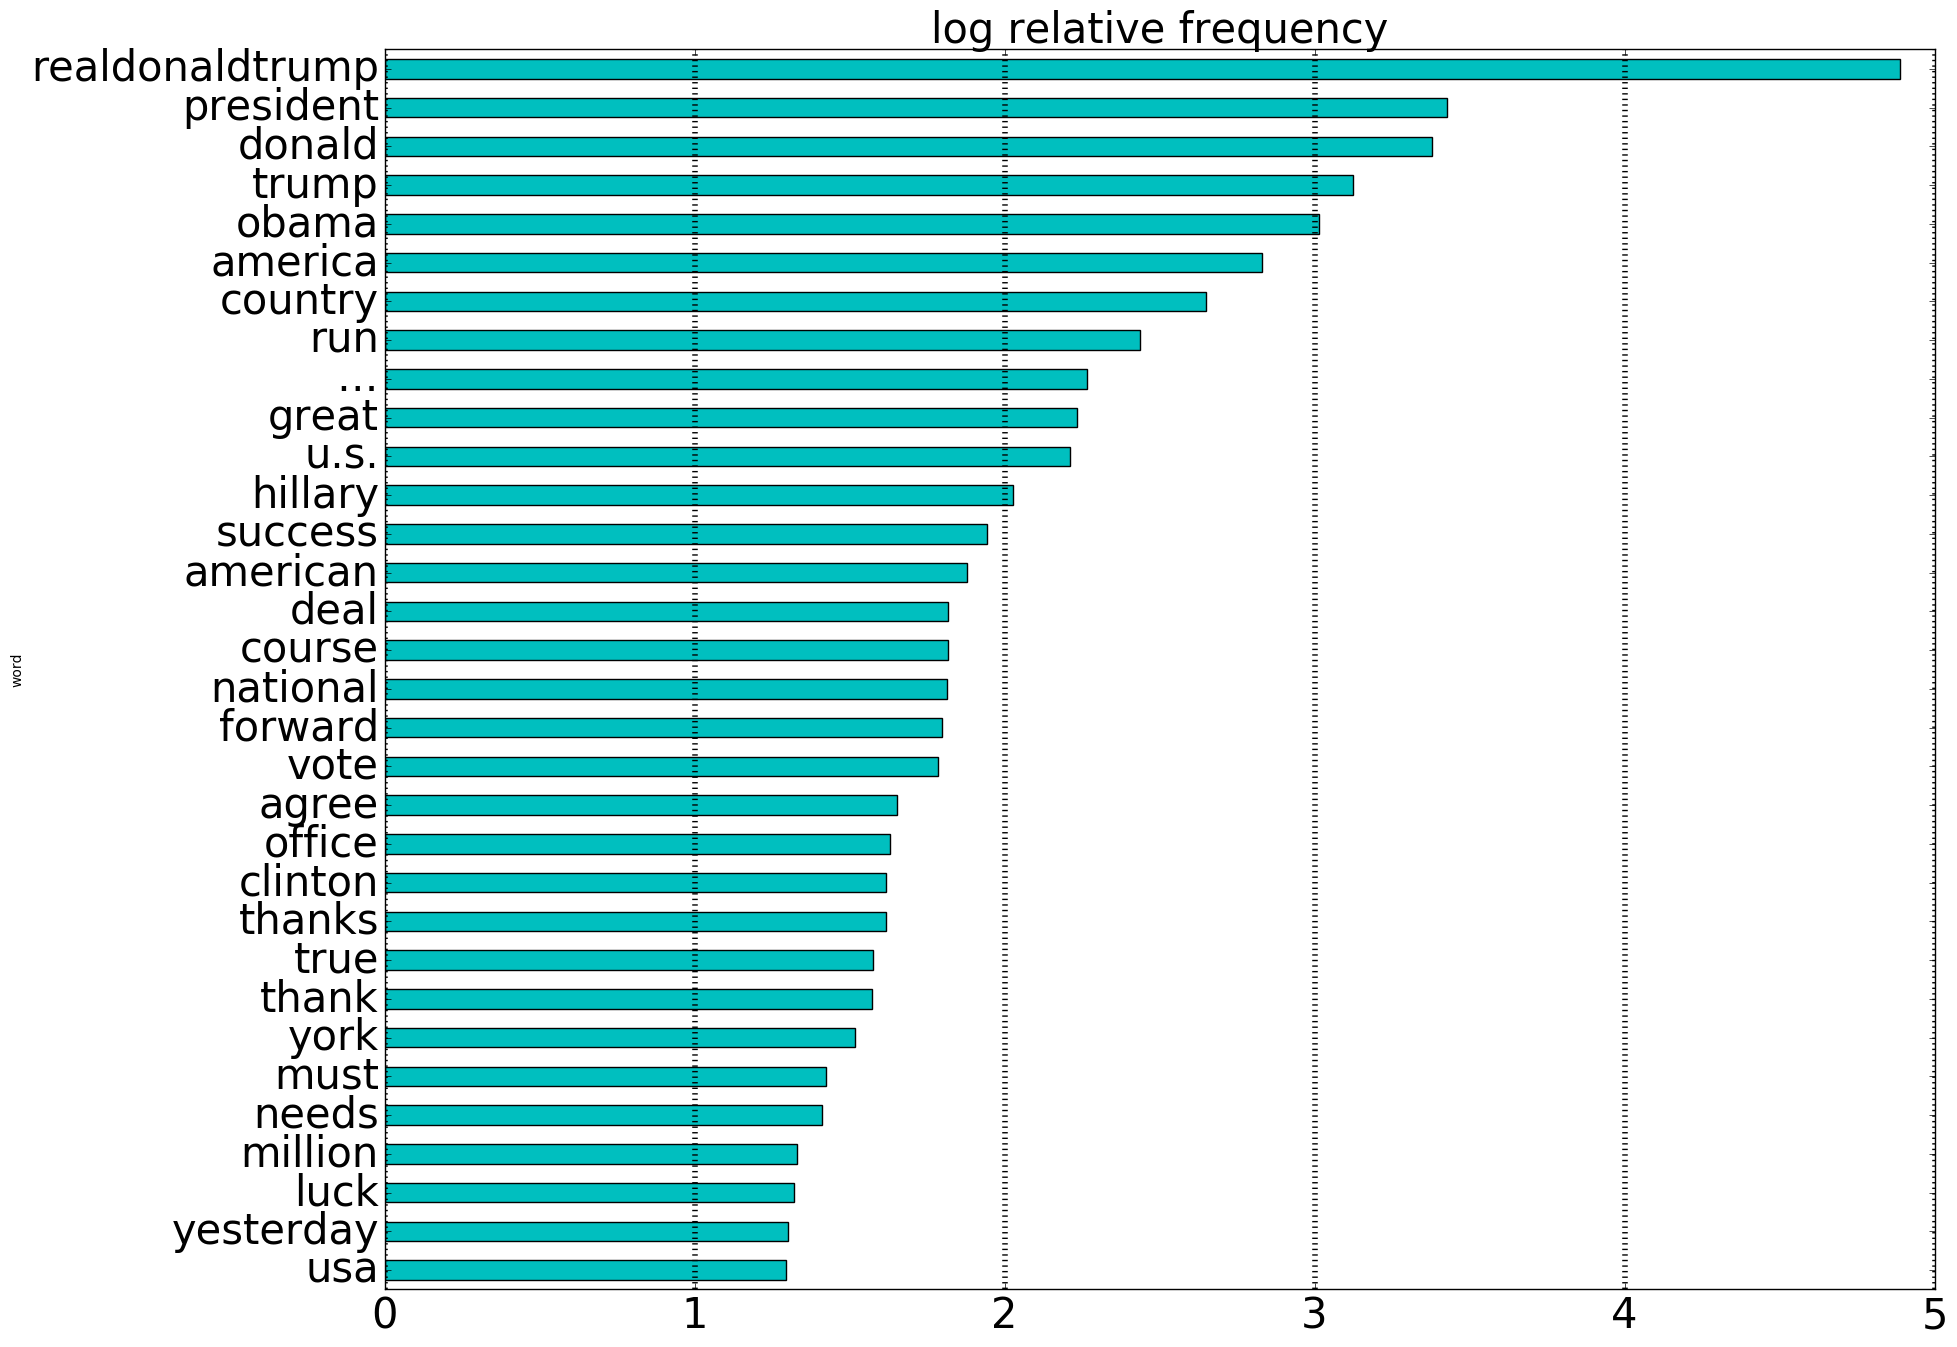

In [20]:
num_words_to_plot = 32
background_cutoff = 10000
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

## And now look at least Trump-like relative to Twitter background:

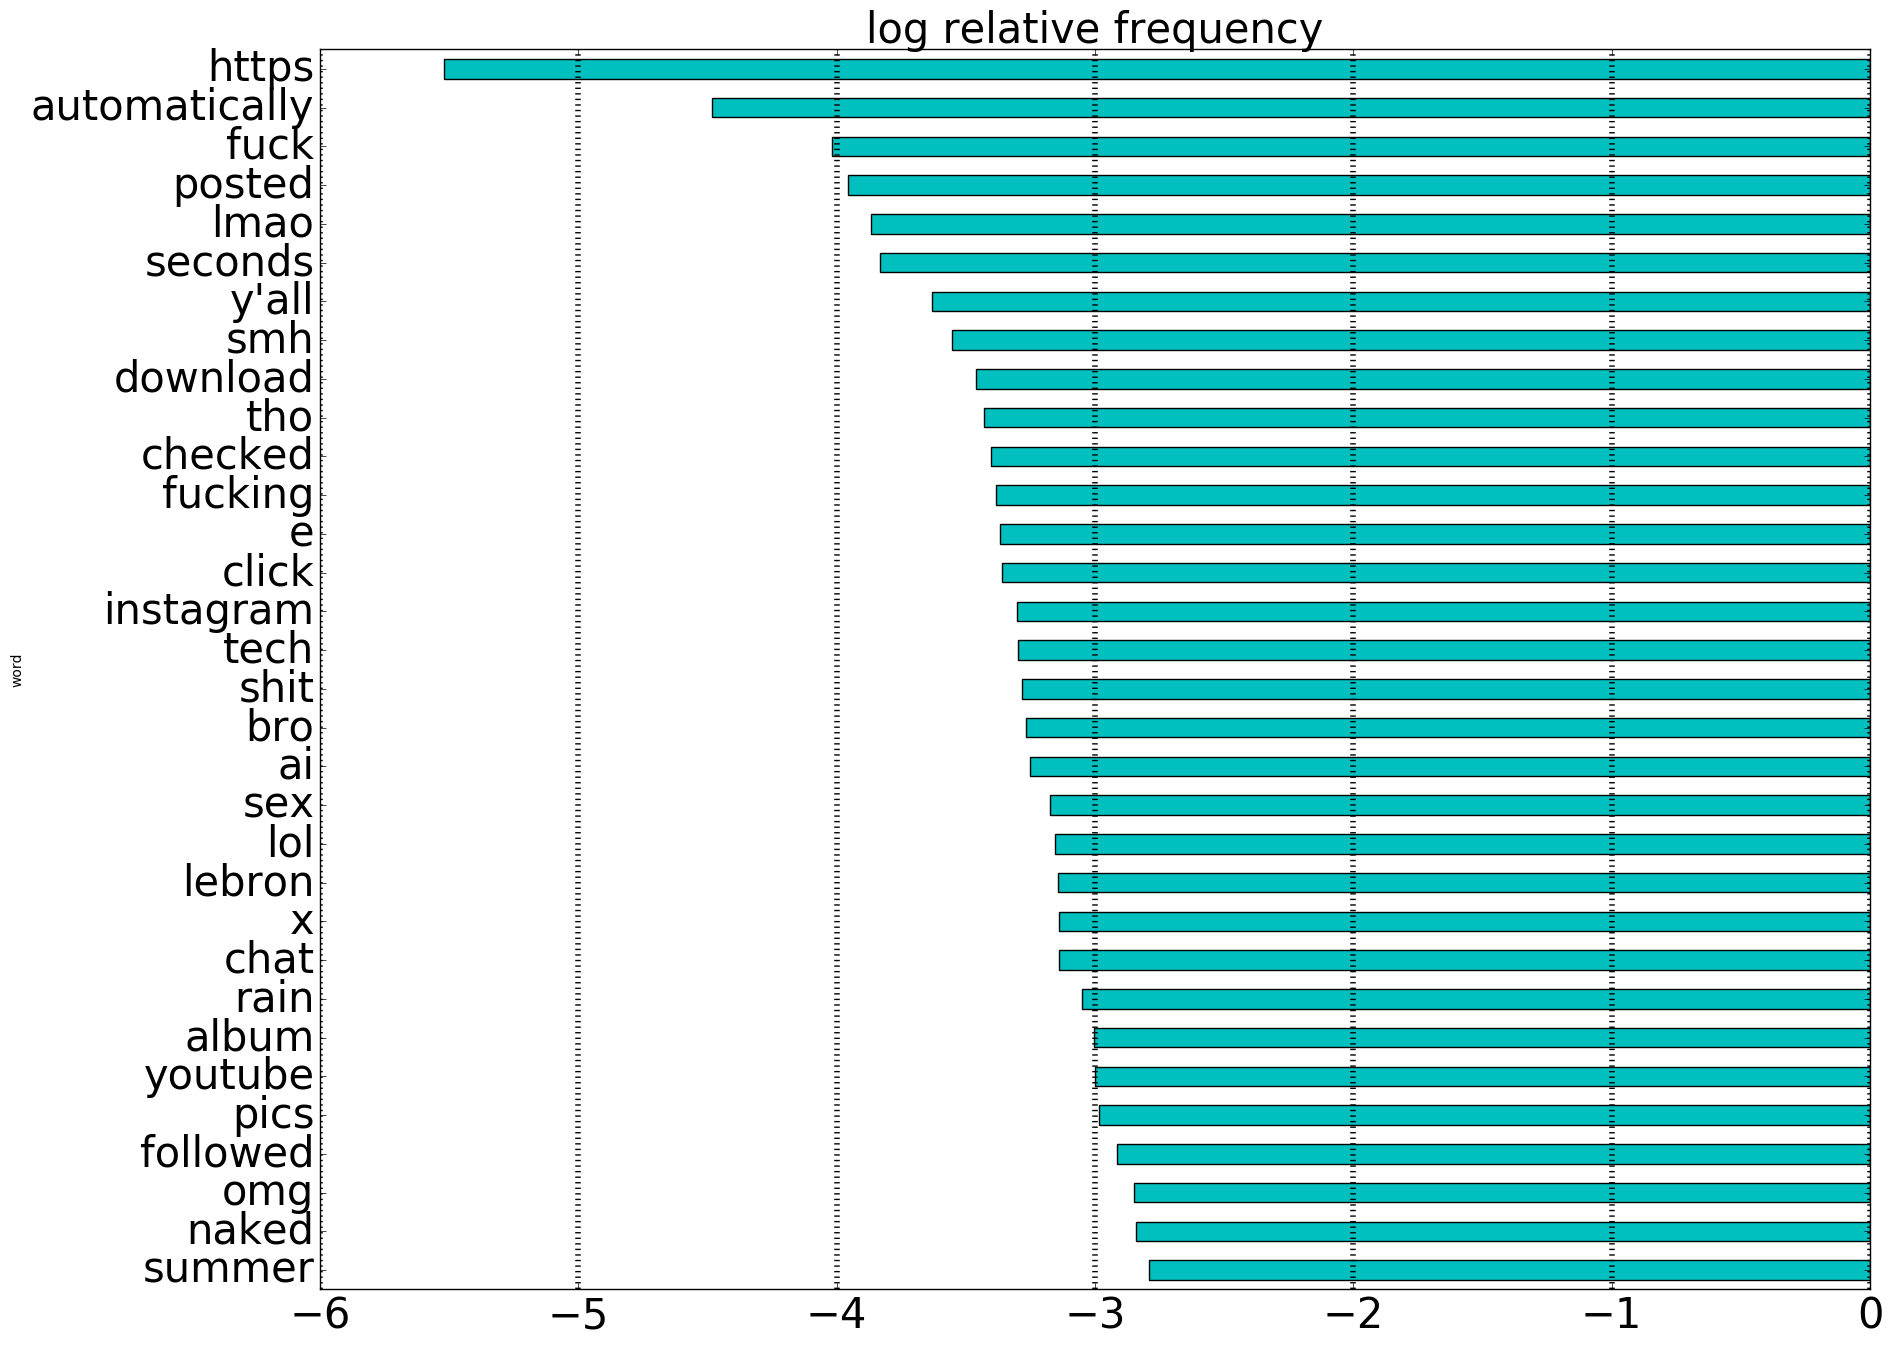

In [23]:
num_words_to_plot = 32
background_cutoff = 10000
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=False).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

Trump does not post about things happening automatically.

In [24]:
twit.tweets_containing("fuck")

20 tweets contain this term


,username,text
7311,NaN,"@benjamin_abey: @realdonaldtrump @mcuban @dallasmavs so? what the fuck is your problem ? the people love him. nobody loves him!"""
7905,NaN,"@ironman1021: i think after watching his roast i've realized that @realdonaldtrump is super fucking bad ass props to you sir"" true - thanks"""
8424,NaN,"@massergio: @realdonaldtrump the fucking truth we need our jobs back!"" that won't happen without new leadership!"""
9128,NaN,"@twitt_be_cray: @realdonaldtrump go fuck yourself you dumb fuck"" when was the last time you had a date-such terrible language (& picture)."""
9246,NaN,"@itsjenwbitches: people can hate on @realdonaldtrump all they want, but in reality he's flying his jet over your fucking house as you tweet"""
9961,NaN,"@jefepinal: @realdonaldtrump is a fucking genius."" true!"""
9963,NaN,"@mishaforever: @realdonaldtrump @mikedgarrison fuck yeah! she should have to pay!"" she said some really bad and stupid things."""
10035,NaN,"@mikomuhfucka: @realdonaldtrump doesn't show enough compassion to ever really be considered a presidential candidate. i have great comp'--"""
13100,NaN,"@lloyd156_: @realdonaldtrump doesnt give a fuck, he just tells it like it is lol legend"" a very honest person, thanks!"""
13970,NaN,"“@realhollishicks so fucking sick of the middle east i agree with trump if we're spending $ over there might as well take their oil"";;@realhollishicks;;436241904083431424"""
